In [123]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
df = pd.read_csv('./data/netflix-rotten-tomatoes-metacritic-imdb.csv')
df=df.drop(columns=["Image", "Poster", "TMDb Trailer", "Trailer Site", "Netflix Link", "IMDb Link", 'Summary', "Director", "Writer", "Genre", "Tags", "Hidden Gem Score", "Runtime", "Actors", "View Rating", "Netflix Release Date", "Production House", "IMDb Votes"])
df

,Title,Languages,Series or Movie,Country Availability,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date
0,Lets Fight Ghost,"Swedish, Spanish",Series,Thailand,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008
1,HOW TO BUILD A GIRL,English,Movie,Canada,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020
2,Centigrade,English,Movie,Canada,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020
3,ANNE+,Turkish,Series,"Belgium,Netherlands",6.5,NaN,NaN,1.0,NaN,NaN,01 Oct 2016
4,Moxie,English,Movie,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",6.3,NaN,NaN,NaN,4.0,NaN,22 Sep 2011
...,...,...,...,...,...,...,...,...,...,...,...
15475,K-POP Extreme Survival,NaN,Series,"South Korea,Argentina,United Kingdom,Australia...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
15476,DreamWorks Shreks Swamp Stories,NaN,Series,"Russia,Hong Kong,Hungary,Australia,South Korea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
15477,DreamWorks Happy Holidays from Madagascar,English,Series,"Belgium,Switzerland,United States,Germany,Unit...",6.8,NaN,NaN,NaN,NaN,NaN,NaN
15478,DreamWorks Holiday Classics,English,Series,"Belgium,Switzerland,Germany,Argentina,United K...",6.4,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# Kategorisieren
df['Release Date'] = pd.to_datetime(df['Release Date'], format = '%d %b %Y')

# Dollarzeichen und Komma entfernen
Boxoffice = df['Boxoffice']

df['Boxoffice'] = df['Boxoffice'].replace({r'\$' : ''}, regex = True)

df['Boxoffice'] = df['Boxoffice'].replace({r'\,' : ''}, regex = True)

df['Boxoffice'] = pd.to_numeric(df['Boxoffice'])


def funct(x):
   if x=="leer":
       return None
   else:
       return len(x.split(","))
       
       
for c in ["Languages", "Country Availability"]:
    df[c]=df[c].fillna("leer")
    df[c]=df[c].apply(funct)

df


,Title,Languages,Series or Movie,Country Availability,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date
0,Lets Fight Ghost,2.0,Series,1.0,7.9,98.0,82.0,74.0,57.0,2122065.0,2008-12-12
1,HOW TO BUILD A GIRL,1.0,Movie,1.0,5.8,79.0,69.0,1.0,NaN,70632.0,2020-05-08
2,Centigrade,1.0,Movie,1.0,4.3,NaN,46.0,NaN,NaN,16263.0,2020-08-28
3,ANNE+,1.0,Series,2.0,6.5,NaN,NaN,1.0,NaN,NaN,2016-10-01
4,Moxie,1.0,Movie,36.0,6.3,NaN,NaN,NaN,4.0,NaN,2011-09-22
...,...,...,...,...,...,...,...,...,...,...,...
15475,K-POP Extreme Survival,NaN,Series,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT
15476,DreamWorks Shreks Swamp Stories,NaN,Series,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT
15477,DreamWorks Happy Holidays from Madagascar,1.0,Series,35.0,6.8,NaN,NaN,NaN,NaN,NaN,NaT
15478,DreamWorks Holiday Classics,1.0,Series,35.0,6.4,NaN,NaN,NaN,NaN,NaN,NaT


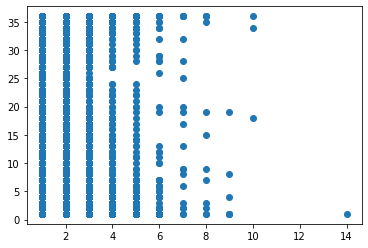

In [125]:
plt.scatter(df["Languages"], df["Country Availability"])

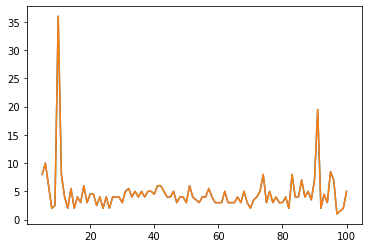

In [126]:
ScorevsCountry = df.groupby("Metacritic Score").median()
#plt.scatter(df["Metacritic Score"], df["Country Availability"])
plt.plot(ScorevsCountry.index, ScorevsCountry["Country Availability"])


ScorevsCountry = df.groupby("Metacritic Score").median()
#plt.scatter(df["Metacritic Score"], df["Country Availability"])
plt.plot(ScorevsCountry.index, ScorevsCountry["Country Availability"])

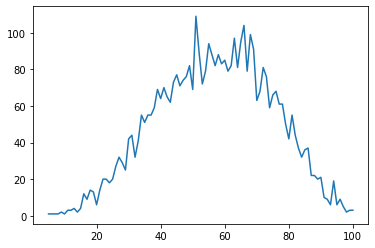

In [127]:
counter = df.groupby("Metacritic Score").size()
plt.plot(counter)


In [128]:
MvsS = df.groupby("Series or Movie").mean()
MvsS

,Languages,Country Availability,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice
Series or Movie,,,,,,,,
Movie,1.487903,10.820407,6.310101,59.456687,56.753647,8.997181,13.834328,4.542950e+07
Series,1.269415,18.306695,7.111465,61.770492,59.779070,7.721119,14.614227,5.734661e+07


In [129]:
def funct(x):
    return x.year

TimeVsLanguage = df
TimeVsLanguage["Release Date"] = TimeVsLanguage["Release Date"].apply(funct).dropna()
Time=TimeVsLanguage.groupby("Release Date").size()
TimeVsLanguage= TimeVsLanguage.groupby("Release Date").mean()


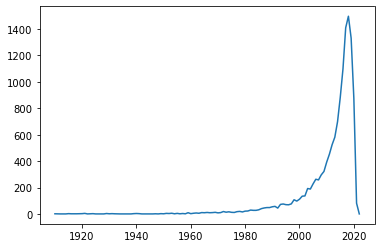

In [130]:
plt.plot(Time)


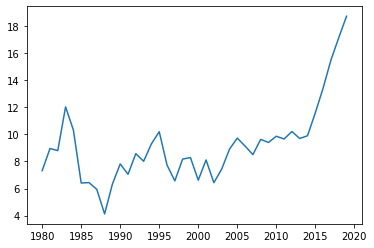

In [137]:
TimeVsLanguage=TimeVsLanguage[TimeVsLanguage.index>1979]
TimeVsLanguage=TimeVsLanguage[TimeVsLanguage.index<2020]
plt.plot(TimeVsLanguage.index, TimeVsLanguage["Country Availability"])